<a href="https://colab.research.google.com/github/abhi2896/Data_Science/blob/main/tele_customer_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [312]:
df_initial = pd.read_csv("/content/Telco_Customer_Churn.csv")

In [313]:
#df_initial.head()
df_initial.sample(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3705,9220-CXRSC,Female,0,Yes,Yes,69,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Credit card (automatic),61.4,4059.85,No
2403,0310-SUCIN,Female,0,Yes,No,71,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),84.8,6046.1,No


In [314]:
len(df_initial.columns)

21

In [315]:
df_initial.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [316]:
#Removing unwanted coloumns
df = df_initial.drop(['customerID','OnlineBackup','DeviceProtection','TotalCharges'] , axis = 1)

In [317]:
print(len(df.columns))
df.columns

17


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')

EDA / Understand Data

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  PaperlessBilling  7043 non-null   object 
 14  PaymentMethod     7043 non-null   object 
 15  MonthlyCharges    7043 non-null   float64
 16  Churn             7043 non-null   object 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


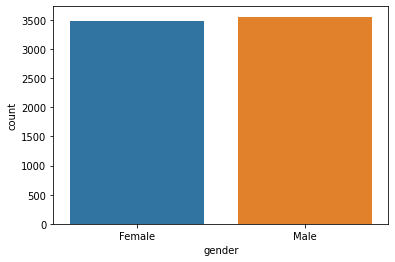

In [319]:
sns.countplot(df['gender'])


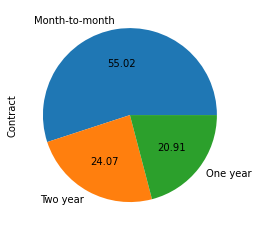

In [320]:
df['Contract'].value_counts().plot(kind='pie',autopct='%.2f')


(array([1797., 1004., 1368., 1822., 1052.]),
 array([ 18.25,  38.35,  58.45,  78.55,  98.65, 118.75]),
 <a list of 5 Patch objects>)

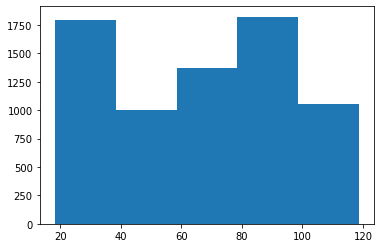

In [321]:
#for mumarical data
plt.hist(df['MonthlyCharges'],bins=5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


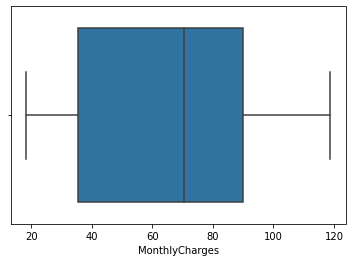

In [322]:
sns.boxplot(df['MonthlyCharges'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


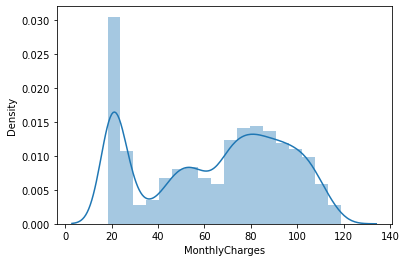

In [323]:
sns.distplot(df['MonthlyCharges'])

In [324]:
df.duplicated().sum()

28

In [325]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

In [326]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [327]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [328]:
#Numarical Columns = SeniorCitizen , Tenure
#categorical colums = gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity	
#                     OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod	
#                     MonthlyCharges,TotalCharges



In [329]:
#1. remove duplicated values 
df.drop_duplicates(inplace = True)

In [330]:
# since we have so many values in tenure (we can make some group)

def make_group(a):
  if a<=5:
    return ("New_customer")
  elif (a>5 and a<=25):
    return ("old_customer")
  else :
    return ("Loyal_customer")  

In [331]:
df['tenure'] = df['tenure'].map(make_group)

In [332]:
df.tenure.value_counts()

Loyal_customer    3751
old_customer      1917
New_customer      1347
Name: tenure, dtype: int64

In [333]:
df.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
3389,Male,0,No,No,New_customer,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Mailed check,70.60,No
847,Female,0,Yes,Yes,old_customer,No,No phone service,DSL,Yes,Yes,No,No,One year,No,Credit card (automatic),33.15,No
2362,Male,0,Yes,Yes,Loyal_customer,No,No phone service,DSL,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.20,No


In [334]:
#Label Encoding = only for output col.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Churn = le.fit_transform(df['Churn'])

Data Spliting

In [335]:
input = df.iloc[:,:-1]
output = df.iloc[:,-1]

In [336]:
output

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7015, dtype: int64

In [337]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(input,output,test_size=0.2)

Encoding

In [338]:
#Nominal Encoding = for Nominal Data (ONE HOT ENCODING)
#Ordinal Encoding = for Ordinal Data
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
#OHE = OneHotEncoder()
#OHE.fit_transform(df[["gender","Partner","Dependents","PhoneService","PhoneService","OnlineSecurity","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]]).toarray()

# To complete this in one step
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[('OE',OrdinalEncoder(categories=[['No phone service','No','Yes'],['No','DSL','Fiber optic'],['No internet service','No','Yes'],['No internet service','No','Yes'],['No internet service','No','Yes'],['No internet service','No','Yes'],['One year','Month-to-month','Two year'],['New_customer','old_customer','Loyal_customer']]),['MultipleLines','InternetService','OnlineSecurity','TechSupport','StreamingTV','StreamingMovies','Contract','tenure'])
    ,('OHE',OneHotEncoder(sparse=False,drop='first'),["gender","Partner","Dependents","PhoneService","PhoneService","TechSupport","PaperlessBilling","PaymentMethod"])
    ],remainder ='passthrough')





In [348]:
X_train = transformer.fit_transform(X_train)

In [349]:
X_test = transformer.transform(X_test)

In [350]:
X_train[3:7]#some random rows from Data

array([[ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,  1.  ,
         0.  ,  0.  ,  1.  ,  1.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ,
         0.  ,  0.  , 20.6 ],
       [ 2.  ,  2.  ,  1.  ,  1.  ,  1.  ,  2.  ,  1.  ,  2.  ,  0.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  0.  , 86.15],
       [ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  , 19.65],
       [ 0.  ,  1.  ,  2.  ,  1.  ,  1.  ,  1.  ,  0.  ,  1.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  , 39.55]])

In [358]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5612, 21)
(5612,)
(1403, 21)
(1403,)


Apply Algorithms

In [359]:
#naive_base
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB().fit(X_train, y_train)

print("train shape: " + str(X_train.shape))
print("score on test: " + str(mnb.score(X_test, y_test)))
print("score on train: "+ str(mnb.score(X_train, y_train)))

train shape: (5612, 21)
score on test: 0.7512473271560941
score on train: 0.7660370634354954


In [361]:
from sklearn.linear_model import SGDClassifier

sgd=SGDClassifier()
sgd.fit(X_train, y_train)

print("train shape: " + str(X_train.shape))
print("score on test: " + str(sgd.score(X_test, y_test)))
print("score on train: "+ str(sgd.score(X_train, y_train)))

train shape: (5612, 21)
score on test: 0.7548111190306486
score on train: 0.7770848182466144


In [362]:
#knearest

from sklearn.neighbors import KNeighborsClassifier

#knn = KNeighborsClassifier(n_neighbors=5,algorithm = 'ball_tree')
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)

knn.fit(X_train, y_train)

print("train shape: " + str(X_train.shape))
print("score on test: " + str(knn.score(X_test, y_test)))
print("score on train: "+ str(knn.score(X_train, y_train)))

train shape: (5612, 21)
score on test: 0.7548111190306486
score on train: 0.8362437633642196


In [364]:
#SVC
from sklearn.svm import LinearSVC

svm=LinearSVC(C=0.0001)
svm.fit(X_train, y_train)

print("train shape: " + str(X_train.shape))
print("score on test: " + str(svm.score(X_test, y_test)))
print("score on train: "+ str(svm.score(X_train, y_train)))

train shape: (5612, 21)
score on test: 0.744832501781896
score on train: 0.7703136136849608


In [366]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# setting 
# min_samples_split=10
# max_depth=4

adb = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=100,learning_rate=0.5)
adb.fit(X_train, y_train)

print("train shape: " + str(X_train.shape))
print("score on test: " + str(adb.score(X_test, y_test)))
print("score on train: "+ str(adb.score(X_train, y_train)))

train shape: (5612, 21)
score on test: 0.7740555951532431
score on train: 0.8259087669280114


In [368]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# setting 
# min_samples_split=10
# max_depth=4

gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(X_train, y_train)

print("train shape: " + str(X_train.shape))
print("score on test: " + str(gbc.score(X_test, y_test)))
print("score on train: "+ str(gbc.score(X_train, y_train)))

train shape: (5612, 21)
score on test: 0.781895937277263
score on train: 0.8232359230220955


In [378]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of desission trees
rf = RandomForestClassifier(n_estimators=300,max_depth=3)
rf.fit(X_train, y_train)

print("score on test: " + str(rf.score(X_test, y_test)))
print("score on train: "+ str(rf.score(X_train, y_train)))

score on test: 0.7576621525302922
score on train: 0.7874198146828225


In [379]:
#voting
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# 1) naive bias = mnb
mnb = MultinomialNB().fit(X_train, y_train)
# 2) logistic regression =lr
lr=LogisticRegression(max_iter=5000)
# 3) random forest =rf
rf = RandomForestClassifier(n_estimators=30,max_depth=3)
# 4) suport vecotr mnachine = svm
svm=LinearSVC(max_iter=5000)

evc=VotingClassifier(estimators=[('mnb',mnb),('lr',lr),('rf',rf),('svm',svm)])
evc.fit(X_train, y_train)

print("score on test: " + str(evc.score(X_test, y_test)))
print("score on train: "+ str(evc.score(X_train, y_train)))

score on test: 0.7690662865288667
score on train: 0.7945473984319316


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
